In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.arima.model import ARIMA

TodaysData_Country = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/web-data/data/cases_country.csv')
cleaned_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/web-data/data/cases_time.csv')


C:\Users\gesua\AppData\Local\Temp\ipykernel_26600\470812053.py:10: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  cleaned_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/web-data/data/cases_time.csv')


In [38]:
import pandas as pd

cleaned_data.reset_index(inplace=True)

us_data = cleaned_data[cleaned_data['Country_Region'] == 'US'].copy()
us_data['Last_Update'] = pd.to_datetime(us_data['Last_Update'], errors='coerce')
us_data = us_data.dropna(subset=['Last_Update', 'Confirmed'])
us_data = us_data.sort_values('Last_Update')
us_data.reset_index(inplace=True)

print(us_data.columns)


C:\Users\gesua\AppData\Local\Temp\ipykernel_26600\2491415266.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  us_data['Last_Update'] = pd.to_datetime(us_data['Last_Update'], errors='coerce')


Index(['level_0', 'index', 'Country_Region', 'Last_Update', 'Confirmed',
       'Deaths', 'Recovered', 'Active', 'Delta_Confirmed', 'Delta_Recovered',
       'Incident_Rate', 'People_Tested', 'People_Hospitalized',
       'Province_State', 'FIPS', 'UID', 'iso3', 'Report_Date_String',
       'Delta_Deaths'],
      dtype='object')


In [39]:
# rolling mean
us_data = cleaned_data[cleaned_data['Country_Region'] == 'US']
us_data_numeric = us_data[['Confirmed', 'Deaths', 'Recovered', 'Active']].copy()
rolmean_us = us_data_numeric.rolling(window=3).mean()
print(rolmean_us.head())

        Confirmed  Deaths  Recovered  Active
212598        NaN     NaN        NaN     NaN
212599        NaN     NaN        NaN     NaN
212600   1.333333     0.0        NaN     NaN
212601   1.666667     0.0        NaN     NaN
212602   3.000000     0.0        NaN     NaN


In [40]:
#rolling std
us_data = cleaned_data[cleaned_data['Country_Region'] == 'US']
us_data_numeric = us_data[['Confirmed', 'Deaths', 'Recovered', 'Active']].copy()
rolstd_us = us_data_numeric.rolling(window=3).std()
print(rolstd_us.head())


        Confirmed  Deaths  Recovered  Active
212598        NaN     NaN        NaN     NaN
212599        NaN     NaN        NaN     NaN
212600   0.577350     0.0        NaN     NaN
212601   0.577350     0.0        NaN     NaN
212602   1.732051     0.0        NaN     NaN


C:\Users\gesua\AppData\Local\Temp\ipykernel_26600\2953845852.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  us_data['Last_Update'] = pd.to_datetime(us_data['Last_Update'], errors='coerce')


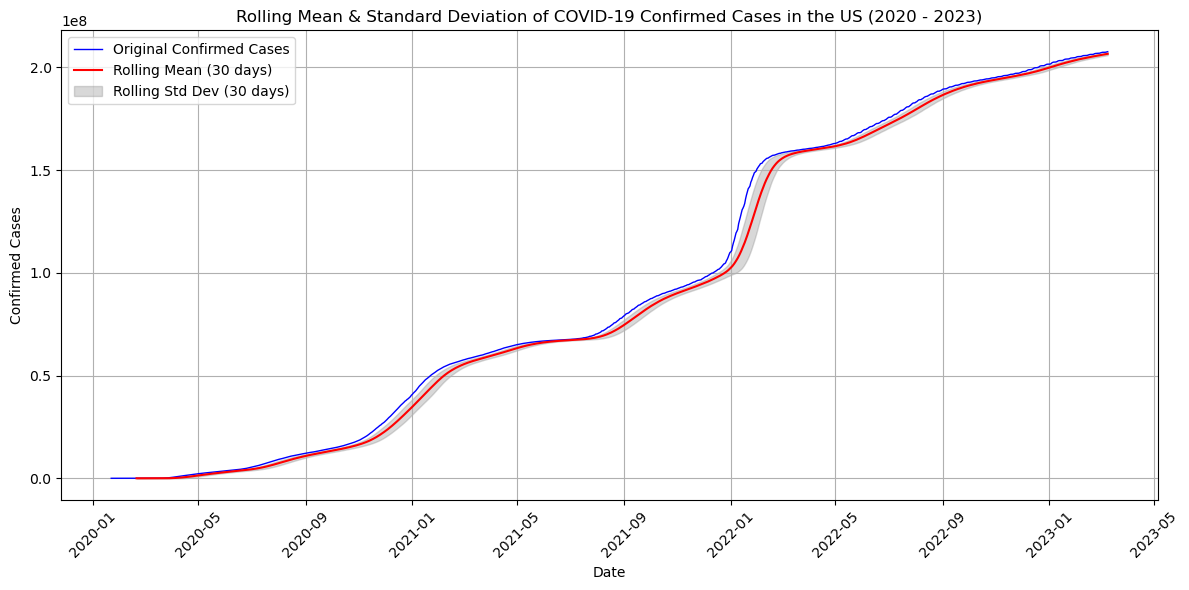

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

us_data = cleaned_data[cleaned_data['Country_Region'] == 'US'].copy()
us_data['Last_Update'] = pd.to_datetime(us_data['Last_Update'], errors='coerce')
us_data = us_data.dropna(subset=['Last_Update', 'Confirmed'])
us_data['Confirmed'] = pd.to_numeric(us_data['Confirmed'], errors='coerce')
us_data = us_data.groupby('Last_Update')['Confirmed'].sum().reset_index()
us_data = us_data.sort_values('Last_Update')
us_data.set_index('Last_Update', inplace=True)

rolling_mean_us = us_data['Confirmed'].rolling(window=30).mean()
rolling_std_us = us_data['Confirmed'].rolling(window=30).std()

plt.figure(figsize=(12, 6))
plt.plot(us_data['Confirmed'], color='b', label='Original Confirmed Cases', linewidth=1)
plt.plot(rolling_mean_us, color='r', label='Rolling Mean (30 days)', linewidth=1.5)
plt.fill_between(us_data.index, rolling_mean_us - rolling_std_us, rolling_mean_us + rolling_std_us, color='gray', alpha=0.3, label='Rolling Std Dev (30 days)')

plt.title('Rolling Mean & Standard Deviation of COVID-19 Confirmed Cases in the US (2020 - 2023)')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.legend(loc='best')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [42]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

print('Results of Dickey-Fuller Test:')

# Perform Dickey-Fuller test on the 'Confirmed' column
dftest = adfuller(us_data['Confirmed'], autolag='AIC')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '# Lags Used', 'Number of Observations Used'])

for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)' % key] = value

print(dfoutput)


Results of Dickey-Fuller Test:
Test Statistic                   -0.033992
p-value                           0.955629
# Lags Used                      23.000000
Number of Observations Used    1119.000000
Critical Value (1%)              -3.436207
Critical Value (5%)              -2.864126
Critical Value (10%)             -2.568147
dtype: float64


C:\Users\gesua\AppData\Local\Temp\ipykernel_26600\2452699430.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  florida_data['Last_Update'] = pd.to_datetime(florida_data['Last_Update'], errors='coerce')


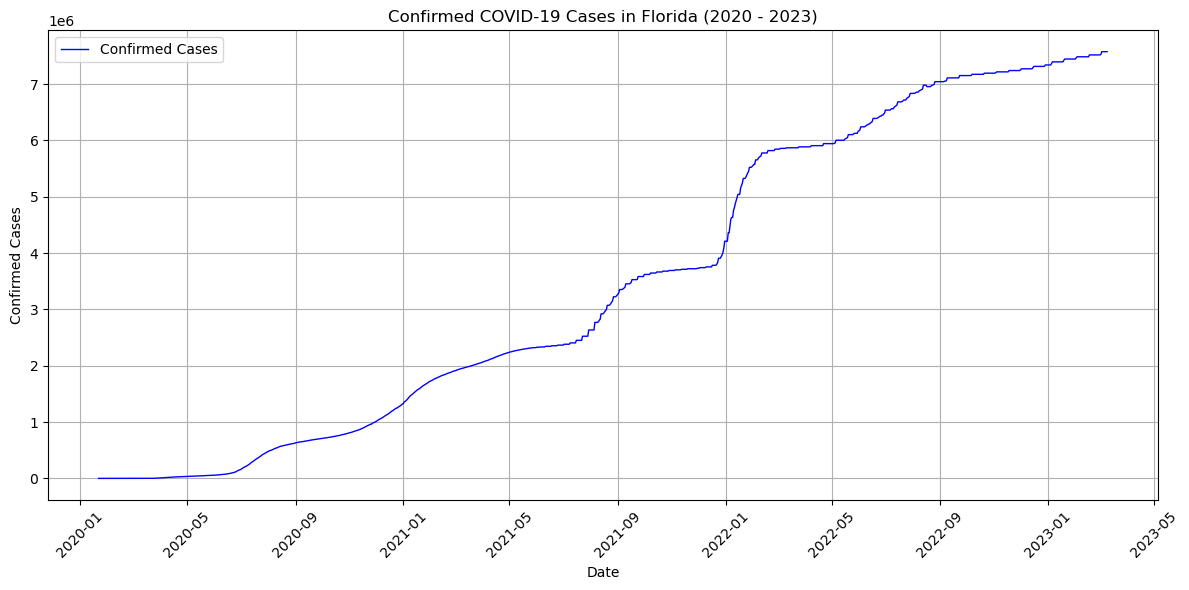

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

florida_data = cleaned_data[(cleaned_data['Country_Region'] == 'US') & (cleaned_data['Province_State'] == 'Florida')].copy()
florida_data['Last_Update'] = pd.to_datetime(florida_data['Last_Update'], errors='coerce')
florida_data = florida_data.dropna(subset=['Last_Update', 'Confirmed'])
florida_data['Confirmed'] = pd.to_numeric(florida_data['Confirmed'], errors='coerce')
florida_data = florida_data.groupby('Last_Update')['Confirmed'].sum().reset_index()
florida_data = florida_data.sort_values('Last_Update')
florida_data.set_index('Last_Update', inplace=True)

plt.figure(figsize=(12, 6))
plt.plot(florida_data['Confirmed'], color='b', label='Confirmed Cases', linewidth=1)

plt.title('Confirmed COVID-19 Cases in Florida (2020 - 2023)')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.legend(loc='best')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\gesua\AppData\Local\Temp\ipykernel_26600\3044543665.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  fl_data['Last_Update'] = pd.to_datetime(fl_data['Last_Update'], errors='coerce')


Results of Augmented Dickey-Fuller Test:
Test Statistic                   -5.490152
p-value                           0.000002
# Lags Used                      23.000000
Number of Observations Used    1118.000000
Critical Value (1%)              -3.436213
Critical Value (5%)              -2.864129
Critical Value (10%)             -2.568148
dtype: float64


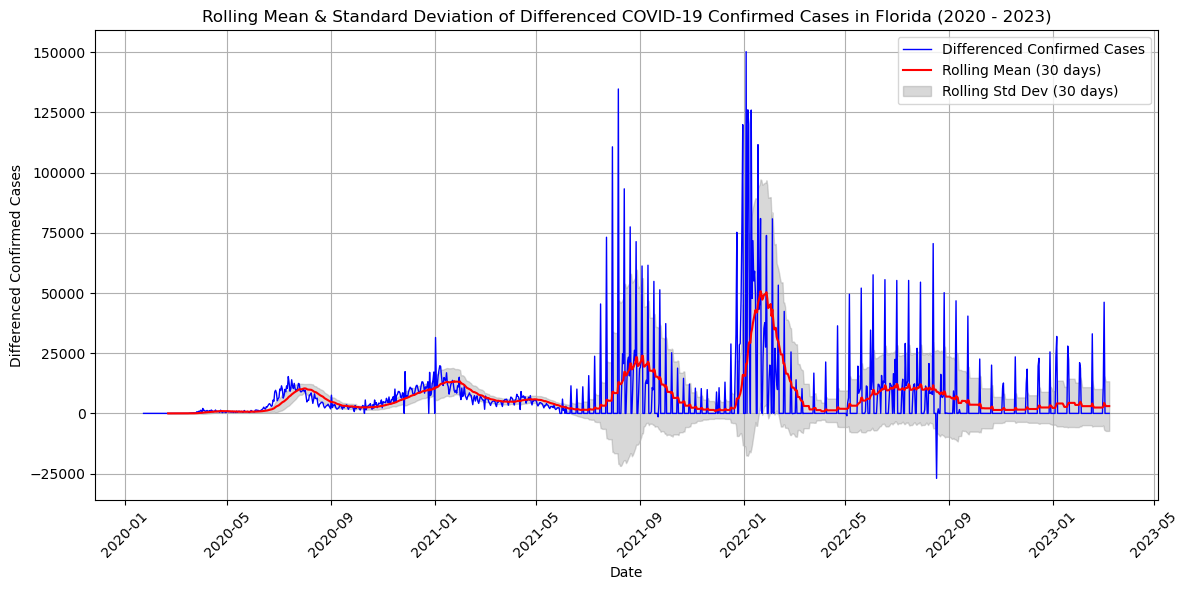

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

fl_data = cleaned_data[(cleaned_data['Country_Region'] == 'US') & (cleaned_data['Province_State'] == 'Florida')].copy()
fl_data['Last_Update'] = pd.to_datetime(fl_data['Last_Update'], errors='coerce')
fl_data = fl_data.dropna(subset=['Last_Update', 'Confirmed'])
fl_data['Confirmed'] = pd.to_numeric(fl_data['Confirmed'], errors='coerce')
fl_data = fl_data.groupby('Last_Update')['Confirmed'].sum().reset_index()
fl_data = fl_data.sort_values('Last_Update')
fl_data.set_index('Last_Update', inplace=True)
fl_data['Differenced_Confirmed'] = fl_data['Confirmed'].diff()
fl_data.dropna(subset=['Differenced_Confirmed'], inplace=True)

print('Results of Augmented Dickey-Fuller Test:')
adf_test = adfuller(fl_data['Differenced_Confirmed'])
adf_results = pd.Series(adf_test[0:4], index=['Test Statistic', 'p-value', '# Lags Used', 'Number of Observations Used'])
for key, value in adf_test[4].items():
    adf_results['Critical Value (%s)' % key] = value
print(adf_results)

rolling_mean_diff = fl_data['Differenced_Confirmed'].rolling(window=30).mean()
rolling_std_diff = fl_data['Differenced_Confirmed'].rolling(window=30).std()

plt.figure(figsize=(12, 6))
plt.plot(fl_data['Differenced_Confirmed'], color='b', label='Differenced Confirmed Cases', linewidth=1)
plt.plot(rolling_mean_diff, color='r', label='Rolling Mean (30 days)', linewidth=1.5)
plt.fill_between(fl_data.index, rolling_mean_diff - rolling_std_diff, rolling_mean_diff + rolling_std_diff,
                 color='gray', alpha=0.3, label='Rolling Std Dev (30 days)')

plt.title('Rolling Mean & Standard Deviation of Differenced COVID-19 Confirmed Cases in Florida (2020 - 2023)')
plt.xlabel('Date')
plt.ylabel('Differenced Confirmed Cases')
plt.legend(loc='best')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [45]:
from statsmodels.tsa.stattools import arma_order_select_ic

# Perform lag selection using arma_order_select_ic
order_selection = arma_order_select_ic(fl_data['Differenced_Confirmed'].dropna(), ic='aic', max_ar=5, max_ma=5)

# Print the optimal AR and MA orders based on AIC
print("Optimal ARMA Orders based on AIC:")
print(order_selection.aic_min_order)


C:\Users\gesua\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\gesua\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\gesua\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\gesua\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\gesua\anaconda3\Lib\site-packages\statsmodels\base\model

Optimal ARMA Orders based on AIC:
(5, 5)


C:\Users\gesua\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


C:\Users\gesua\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\gesua\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\gesua\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\gesua\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


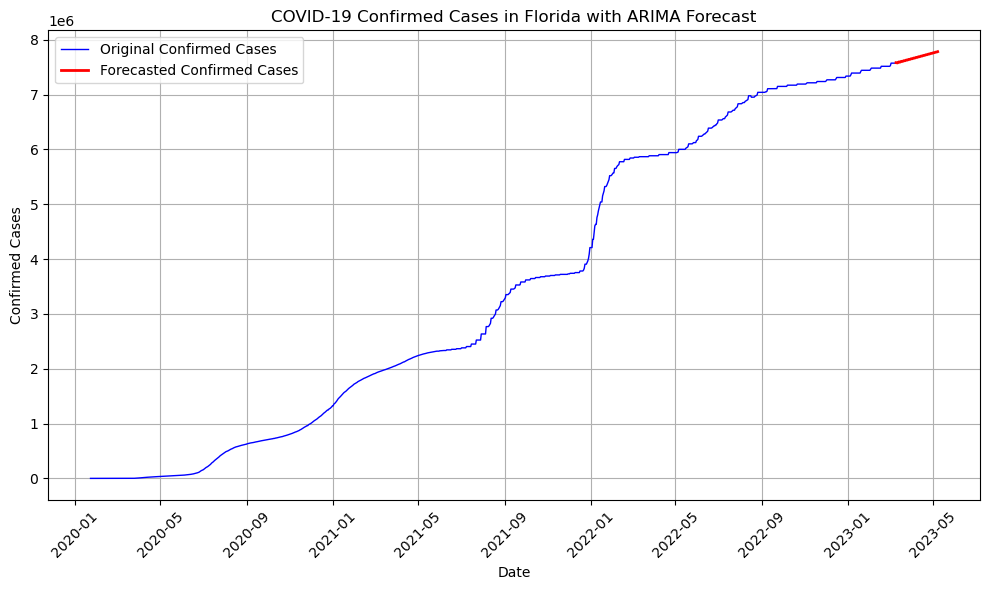

In [46]:
model = ARIMA(fl_data['Differenced_Confirmed'].dropna(), order=(5, 0, 5))
fit_arima = model.fit()

forecast_steps = 60
forecast = fit_arima.forecast(steps=forecast_steps)

last_observed = fl_data['Confirmed'].iloc[-1]
forecast_original_scale = forecast.cumsum() + last_observed

plt.figure(figsize=(10, 6))
plt.plot(fl_data.index, fl_data['Confirmed'], label='Original Confirmed Cases', color='blue', linewidth=1)

forecast_dates = pd.date_range(start=fl_data.index[-1] + pd.Timedelta(days=1), periods=forecast_steps)
plt.plot(forecast_dates, forecast_original_scale, label='Forecasted Confirmed Cases', color='red', linewidth=2)

plt.title('COVID-19 Confirmed Cases in Florida with ARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\gesua\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\gesua\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\gesua\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\gesua\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


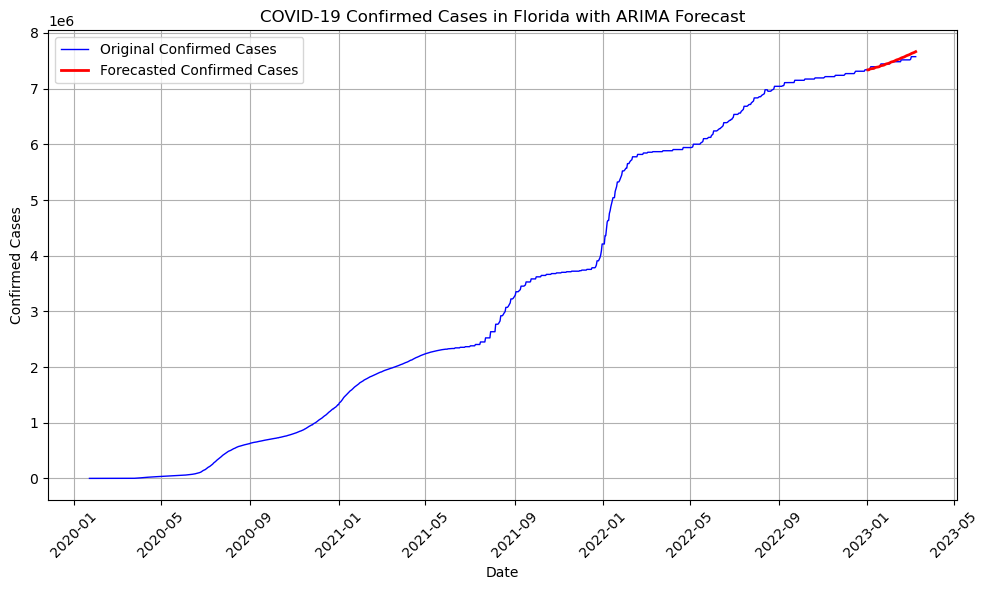

Hold-Out MAPE: 0.4569972333327672


In [47]:
train_end_date = '2023-01-01'
test_start_date = '2023-01-02'
test_end_date = '2023-03-09'

training_data = fl_data.loc[:train_end_date, 'Differenced_Confirmed'].dropna()

model = ARIMA(training_data, order=(5, 0, 5))
fit_arima = model.fit()

forecast_steps = len(pd.date_range(start=test_start_date, end=test_end_date, freq="D"))
forecast_differenced = fit_arima.forecast(steps=forecast_steps)

last_observed = fl_data.loc[train_end_date, 'Confirmed']
forecast_original_scale = forecast_differenced.cumsum() + last_observed

forecast_dates = pd.date_range(start=test_start_date, periods=forecast_steps)

plt.figure(figsize=(10, 6))
plt.plot(fl_data.index, fl_data['Confirmed'], label='Original Confirmed Cases', color='blue', linewidth=1)
plt.plot(forecast_dates, forecast_original_scale, label='Forecasted Confirmed Cases', color='red', linewidth=2)

plt.title('COVID-19 Confirmed Cases in Florida with ARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


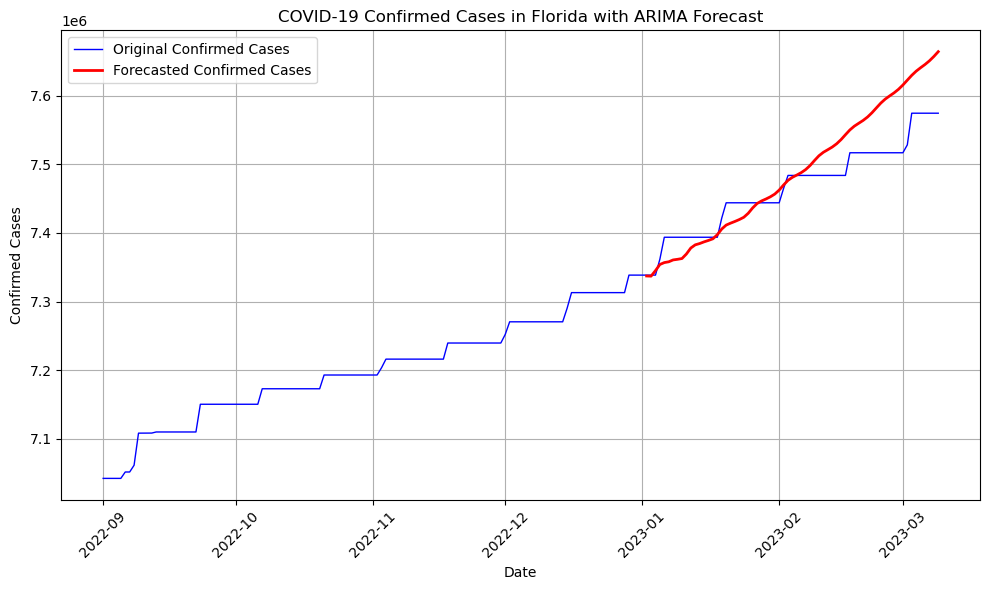

In [62]:
plot_start_date = '2022-09-01'

plt.figure(figsize=(10, 6))
plt.plot(fl_data.loc[plot_start_date:test_end_date].index, fl_data.loc[plot_start_date:test_end_date, 'Confirmed'], label='Original Confirmed Cases', color='blue', linewidth=1)
plt.plot(forecast_dates, forecast_original_scale, label='Forecasted Confirmed Cases', color='red', linewidth=2)

plt.title('COVID-19 Confirmed Cases in Florida with ARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [64]:
actual_testing_data = fl_data.loc[test_start_date:test_end_date, 'Confirmed']
mape = (abs((actual_testing_data.values - forecast_original_scale.values) / actual_testing_data.values)).mean() * 100
print("Hold-Out MAPE:", mape)

rmse = ((actual_testing_data.values - forecast_original_scale.values) ** 2).mean() ** 0.5
print("RMSE:", rmse)


Hold-Out MAPE: 0.4569972333327672
RMSE: 44609.035269031796


C:\Users\gesua\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\gesua\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\gesua\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


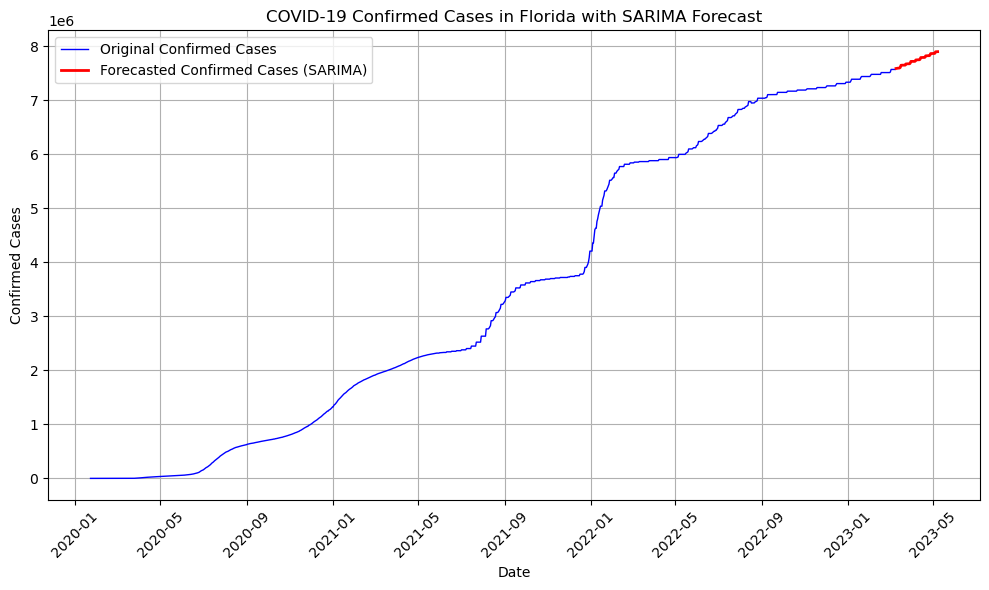

In [73]:
#SARIMA MODEL to include Seasonality, weekly
from statsmodels.tsa.statespace.sarimax import SARIMAX

sarima_model = SARIMAX(fl_data['Differenced_Confirmed'].dropna(), 
                       order=(5, 0, 5), 
                       seasonal_order=(1, 1, 1, 7))

fit_sarima = sarima_model.fit()

forecast_steps = 60
forecast = fit_sarima.forecast(steps=forecast_steps)

last_observed = fl_data['Confirmed'].iloc[-1]
forecast_original_scale = forecast.cumsum() + last_observed

plt.figure(figsize=(10, 6))
plt.plot(fl_data.index, fl_data['Confirmed'], label='Original Confirmed Cases', color='blue', linewidth=1)

forecast_dates = pd.date_range(start=fl_data.index[-1] + pd.Timedelta(days=1), periods=forecast_steps)
plt.plot(forecast_dates, forecast_original_scale, label='Forecasted Confirmed Cases (SARIMA)', color='red', linewidth=2)

plt.title('COVID-19 Confirmed Cases in Florida with SARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\gesua\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\gesua\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\gesua\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


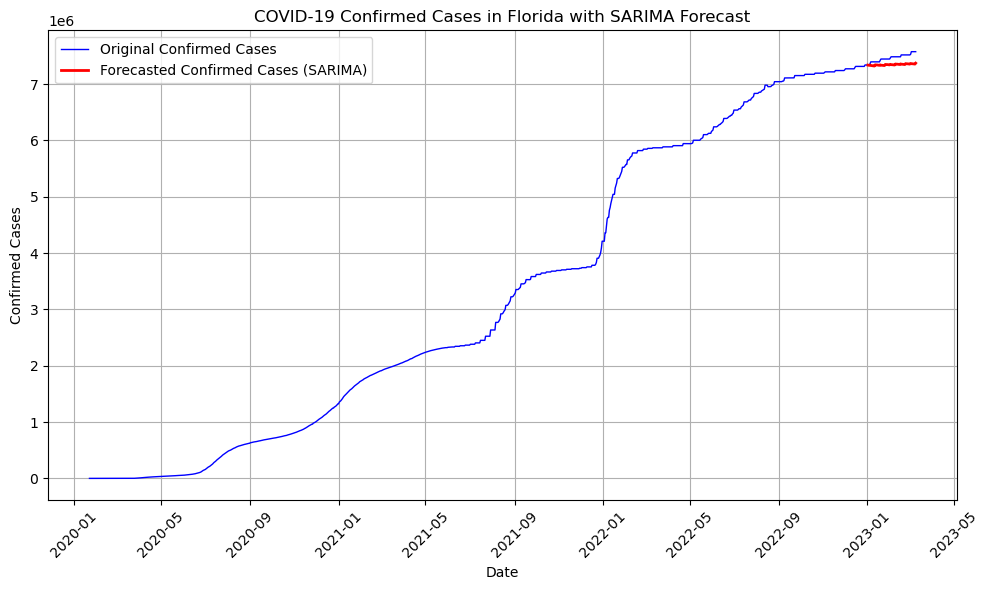

In [75]:
#Applying hold-out MAPE

train_end_date = '2023-01-01'
test_start_date = '2023-01-02'
test_end_date = '2023-03-09'

training_data = fl_data.loc[:train_end_date, 'Differenced_Confirmed'].dropna()

sarima_model = SARIMAX(training_data, order=(5, 0, 5), seasonal_order=(1, 1, 1, 7))
fit_sarima = sarima_model.fit()

forecast_steps = len(pd.date_range(start=test_start_date, end=test_end_date, freq="D"))
forecast_differenced = fit_sarima.forecast(steps=forecast_steps)

last_observed = fl_data.loc[train_end_date, 'Confirmed']
forecast_original_scale = forecast_differenced.cumsum() + last_observed

forecast_dates = pd.date_range(start=test_start_date, periods=forecast_steps)

plt.figure(figsize=(10, 6))
plt.plot(fl_data.index, fl_data['Confirmed'], label='Original Confirmed Cases', color='blue', linewidth=1)
plt.plot(forecast_dates, forecast_original_scale, label='Forecasted Confirmed Cases (SARIMA)', color='red', linewidth=2)

plt.title('COVID-19 Confirmed Cases in Florida with SARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Training Data: Uses the entire Differenced_Confirmed series, as in the original code.
Forecast Steps: Forecasts for the next 60 days, starting from the last date in fl_data.
Plotting Consistency: Forecasted data is plotted with a continuous timeline that begins after the last observed data point.

In [77]:

mape = (abs((actual_testing_data.values - forecast_original_scale.values) / actual_testing_data.values)).mean() * 100
print("Hold-Out MAPE:", mape)

rmse = ((actual_testing_data.values - forecast_original_scale.values) ** 2).mean() ** 0.5
print("RMSE:", rmse)

Hold-Out MAPE: 1.615161026899601
RMSE: 132247.95076477126
